In [78]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
from scipy import stats

In [79]:
datos = pd.read_csv("casa_comida.csv")
datos

,ID,Tipo comida,Ingreso estimado,Frecuencia mensual,Gasto estimado,Horario
0,1,Ensalada,54.58,0.24,5.82,Noche
1,2,Vegana,656.52,0.20,273.31,Noche
2,3,Vegana,624.30,0.25,282.08,Noche
3,4,Ensalada,NaN,0.24,NaN,Día
4,5,Pizza,580.01,0.11,417.78,Noche
...,...,...,...,...,...,...
1007,996,Pizza,1724.12,0.85,1266.09,Noche
1008,997,Pasta,NaN,0.81,NaN,Noche
1009,998,Papa Frita,1674.53,0.70,1341.02,Noche
1010,999,Sushi,1587.35,0.80,1292.02,Noche


INSPECCIONAMOS Y CARACTERIZAMOS

In [80]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1012 non-null   int64  
 1   Tipo comida         1012 non-null   object 
 2   Ingreso estimado    1001 non-null   float64
 3   Frecuencia mensual  993 non-null    float64
 4   Gasto estimado      999 non-null    float64
 5   Horario             1012 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 47.6+ KB


In [81]:
datos.describe()

,ID,Ingreso estimado,Frecuencia mensual,Gasto estimado
count,1012.000000,1001.000000,993.000000,999.000000
mean,499.844862,1095.882468,0.504381,749.587728
std,289.254232,521.360376,0.255836,424.844709
min,1.000000,28.600000,-0.200000,2.820000
25%,249.750000,560.330000,0.230000,323.505000
50%,499.500000,1094.950000,0.500000,741.100000
75%,750.250000,1613.180000,0.770000,1182.750000
max,1000.000000,2379.690000,1.220000,1942.490000


<AxesSubplot:>

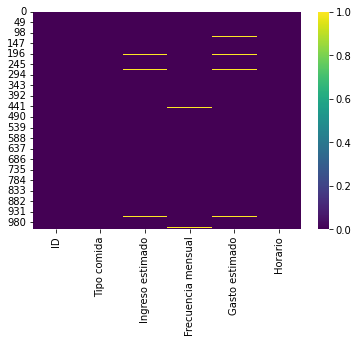

In [82]:
sns.heatmap(datos.isnull(),cmap="viridis")

Observamos que hay muy pocos datos nulos, por ende los podemos eliminar.

In [83]:
datos2 = datos.dropna()
datos2

,ID,Tipo comida,Ingreso estimado,Frecuencia mensual,Gasto estimado,Horario
0,1,Ensalada,54.58,0.24,5.82,Noche
1,2,Vegana,656.52,0.20,273.31,Noche
2,3,Vegana,624.30,0.25,282.08,Noche
4,5,Pizza,580.01,0.11,417.78,Noche
5,6,Pizza,439.10,-0.18,222.18,Noche
...,...,...,...,...,...,...
1006,995,Sushi,1620.57,0.82,1236.29,Noche
1007,996,Pizza,1724.12,0.85,1266.09,Noche
1009,998,Papa Frita,1674.53,0.70,1341.02,Noche
1010,999,Sushi,1587.35,0.80,1292.02,Noche


Ya con el dataset sin los datos nulos tenemos 980 rows,antes teniamos 1012, sacamos aprox el 10%.Es decir que los datos nulos ocupaban el 10% del dataset.

In [84]:
columnas = list(datos.columns)
columnas

['ID',
 'Tipo comida',
 'Ingreso estimado',
 'Frecuencia mensual',
 'Gasto estimado',
 'Horario']

In [85]:
del(columnas[0:2])


In [86]:
columnas

['Ingreso estimado', 'Frecuencia mensual', 'Gasto estimado', 'Horario']

In [87]:
del(columnas[3])

In [88]:
columnas

['Ingreso estimado', 'Frecuencia mensual', 'Gasto estimado']

Nos quedamos con las columnas numericas, para poder analizar los datos numericos-

Verificamos si es normal

In [89]:
def verificacion_de_medias(lista):
    test = {}
    for columna in lista:
        w, p = stats.shapiro(datos[columna].dropna())
        test[columna] = p
    return test

In [90]:
columnas

['Ingreso estimado', 'Frecuencia mensual', 'Gasto estimado']

In [91]:
verificacion_de_medias(columnas)

{'Ingreso estimado': 1.7371185774404544e-19,
 'Frecuencia mensual': 7.09651040939859e-22,
 'Gasto estimado': 1.6374471587251932e-20}

Como todos son menores a 0,05 no son normales y por ende las tenemos que normalizar.

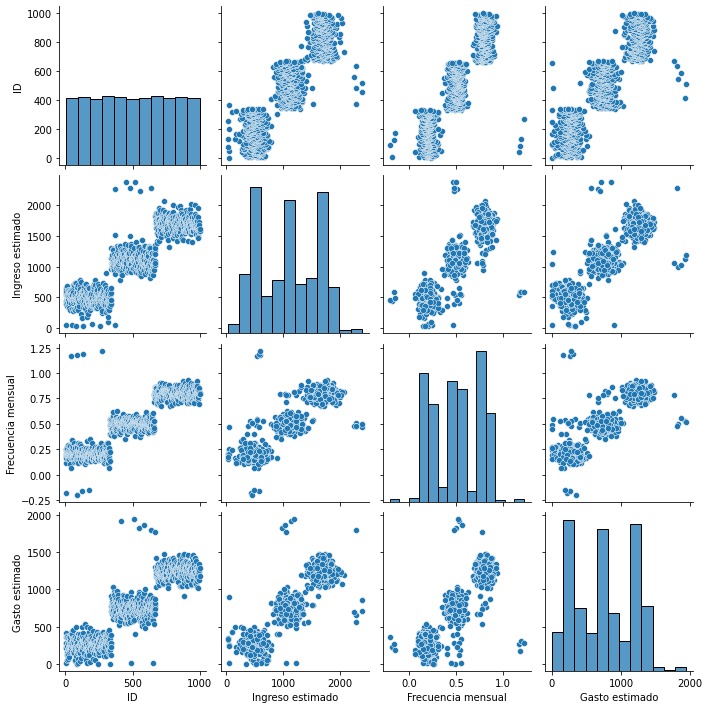

In [92]:
sns.pairplot(datos2)

Relacionamos el ingreso estimado con la frecuencia mensual, porque con esos datos podemos llegamos a brindarle una informacion apropiada a la dueña del resto para tomar decisiones respecto a la cantidad.

                                                                          ANOMALIAS
                                                                          

Los datos nulos ya los eliminamos antes.

Eliminamos los datos duplicados

In [93]:
datos3 = datos2.drop_duplicates().reset_index(drop = True)

In [94]:
datos3

,ID,Tipo comida,Ingreso estimado,Frecuencia mensual,Gasto estimado,Horario
0,1,Ensalada,54.58,0.24,5.82,Noche
1,2,Vegana,656.52,0.20,273.31,Noche
2,3,Vegana,624.30,0.25,282.08,Noche
3,5,Pizza,580.01,0.11,417.78,Noche
4,6,Pizza,439.10,-0.18,222.18,Noche
...,...,...,...,...,...,...
963,995,Sushi,1620.57,0.82,1236.29,Noche
964,996,Pizza,1724.12,0.85,1266.09,Noche
965,998,Papa Frita,1674.53,0.70,1341.02,Noche
966,999,Sushi,1587.35,0.80,1292.02,Noche


Observamos que eliminamos 12 rows por los datos duplicados.

Relacionamos el ingreso estimado con la frecuencia mensual, porque con esos datos podemos llegamos a brindarle una informacion apropiada a la dueña del resto para tomar decisiones respecto a la cantidad.

Sacamos outlayers

In [95]:
Cs1 = datos3["Ingreso estimado"].quantile(0.95)
Ci1 = datos3["Ingreso estimado"].quantile(0.05)
Cs2 = datos3["Frecuencia mensual"].quantile(0.95)
Ci2 = datos3["Frecuencia mensual"].quantile(0.05)

datos4= datos3[(datos3['Ingreso estimado'] >= Ci1) & (datos3['Ingreso estimado'] <= Cs1) & (datos3['Frecuencia mensual'] >= Ci2) & (datos3['Frecuencia mensual'] <= Cs2)]

In [96]:
datos4

,ID,Tipo comida,Ingreso estimado,Frecuencia mensual,Gasto estimado,Horario
1,2,Vegana,656.52,0.20,273.31,Noche
2,3,Vegana,624.30,0.25,282.08,Noche
5,7,Ensalada,541.80,0.18,366.88,Noche
6,8,Empanada,387.73,0.16,206.83,Día
7,9,Sandwich,543.67,0.27,375.13,Día
...,...,...,...,...,...,...
963,995,Sushi,1620.57,0.82,1236.29,Noche
964,996,Pizza,1724.12,0.85,1266.09,Noche
965,998,Papa Frita,1674.53,0.70,1341.02,Noche
966,999,Sushi,1587.35,0.80,1292.02,Noche


Achicamos el dataframe y nos quedamos con 801 rows.

<AxesSubplot:>

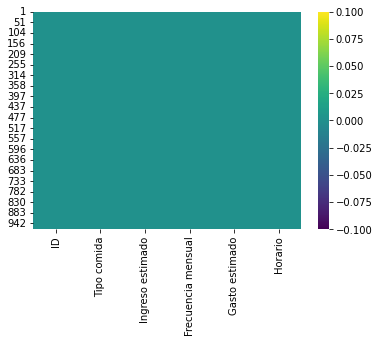

In [97]:
sns.heatmap(datos4.isnull(),cmap="viridis")

Observamos que ya no tenemos datos nulos.

Luego de limpiar y filtrar los datos, ahora normalizamos.

In [98]:
scaler = StandardScaler()
datos_escalado = scaler.fit_transform(datos4[columnas])

Una vez que normalizamos, observamos las inercias y hacemos el kmeans.

In [99]:
def inercias_por_k(datos_escalado):
  inercias = {}
  for i in range(1,11):
      kmeans = KMeans(n_clusters = i, init="random", n_init=10, max_iter=300, random_state=123457)
      kmeans.fit(datos_escalado)
      inercias[i] = kmeans.inertia_
  return inercias

In [100]:
inercias = inercias_por_k(datos_escalado)

In [101]:
inercias

{1: 2402.9999999999995,
 2: 779.101844221292,
 3: 175.9564405017448,
 4: 159.52289492941142,
 5: 143.53689594922474,
 6: 129.96778961144838,
 7: 111.83798414937407,
 8: 103.32935353955372,
 9: 92.77592225415943,
 10: 89.21485866762312}

In [102]:
datos_inercias = pd.DataFrame(inercias.items(),columns=["k","inercia"] )

<AxesSubplot:xlabel='k', ylabel='inercia'>

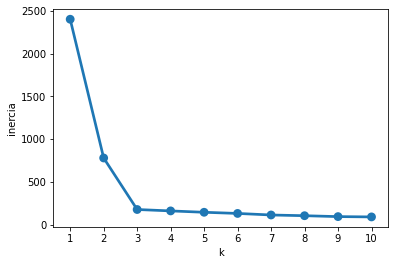

In [103]:
sns.pointplot(data =datos_inercias, x = "k", y ="inercia")

Observamos un gran cambio de pendiente en el grafico del codo en k=2

In [104]:
k = 2
#agrupar
KMeans = KMeans(n_clusters=k, init = "random",n_init=10,max_iter=500,random_state=123457)
KMeans.fit(datos_escalado)

KMeans(init='random', max_iter=500, n_clusters=2, random_state=123457)

<AxesSubplot:>

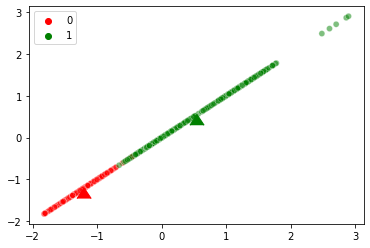

In [107]:
colores = ["red", "green"]
sns.scatterplot(x = datos_escalado[:,2], y= datos_escalado[:,2], hue = KMeans.labels_, palette = colores, alpha = 0.5)
sns.scatterplot(x = KMeans.cluster_centers_[:,2], y = KMeans.cluster_centers_[:, 2], zorder = 10, palette = colores, hue= [0,1], legend = False, marker = 6, s = 200)

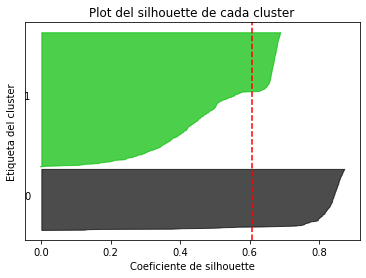

In [108]:
silhouette_avg = silhouette_score(datos_escalado, KMeans.labels_)
sample_silhouette_values = silhouette_samples(datos_escalado, KMeans.labels_)

def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])

graficarSilhouette (k, KMeans.labels_, sample_silhouette_values, silhouette_avg)

Podemos concluir que estan bien agrupados los dos grupos ya que no hay numeros negativos, se ve un gran volumen de datos en ambos grupos, a pesat de que el grupo 0 es mas constante con respecto a cantidad.